In [2]:
import numpy as np
import dask as dd
import dask.array as da
import torch

import pandas as pd
import timeit

In [ ]:
import csv
import os

powers = [1, 2, 3, 4, 5, 6, 7]
results = []

for power in powers:
    size = 10**power
    
    # Python list addition
    list_a = list(range(size))
    list_b = list(range(size))
    py_time = timeit.timeit(lambda: [a + b for a, b in zip(list_a, list_b)], number=1)
    
    # NumPy array addition
    np_a = np.arange(size)
    np_b = np.arange(size)
    np_time = timeit.timeit(lambda: np_a + np_b, number=1)
    
    # Dask array addition
    da_a = da.arange(size, chunks=size//4)
    da_b = da.arange(size, chunks=size//4)
    da_time = timeit.timeit(lambda: (da_a + da_b).compute(), number=1)
    
    # PyTorch tensor addition
    torch_a = torch.arange(size)
    torch_b = torch.arange(size)
    torch_time = timeit.timeit(lambda: torch_a + torch_b, number=1)
    
    # Append the results
    results.append([power, py_time, np_time, da_time, torch_time])

file_path = os.path.join('data', 'performance_results.csv')

# Write the results to a CSV file
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Power", "Python", "NumPy", "Dask", "Torch"])
    writer.writerows(results)

print("Performance results have been written to performance_results.csv")

In [6]:
df = pd.read_csv('./data/performance_results.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Power   8 non-null      int64  
 1   Python  7 non-null      float64
 2   NumPy   8 non-null      float64
 3   Dask    8 non-null      float64
 4   Torch   8 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 448.0 bytes


,Power,Python,NumPy,Dask,Torch
count,8.00000,7.000000,8.000000,8.000000,8.000000
mean,4.50000,0.177193,0.047322,0.140458,0.093148
std,2.44949,0.417429,0.117894,0.343748,0.232369
min,1.00000,0.000008,0.000009,0.003840,0.000030
25%,2.75000,0.000050,0.000020,0.004542,0.000067
50%,4.50000,0.000785,0.000313,0.005801,0.000437
75%,6.25000,0.059999,0.012072,0.034253,0.022676
max,8.00000,1.119459,0.337422,0.987283,0.664762


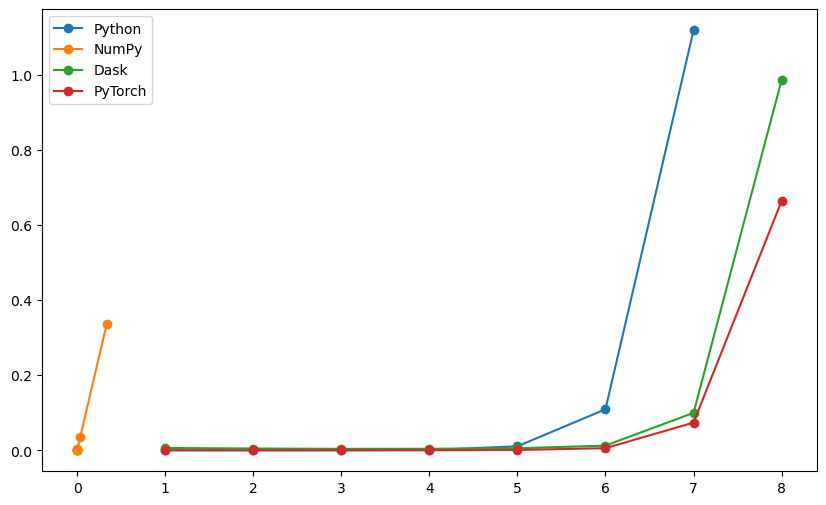

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Power'], df['Python'], marker='o', label='Python')
plt.plot(df['NumPy'], df['NumPy'], marker='o', label='NumPy')
plt.plot(df['Power'], df['Dask'], marker='o', label='Dask')
plt.plot(df['Power'], df['Torch'], marker='o', label='PyTorch')
plt.legend()
plt.show()

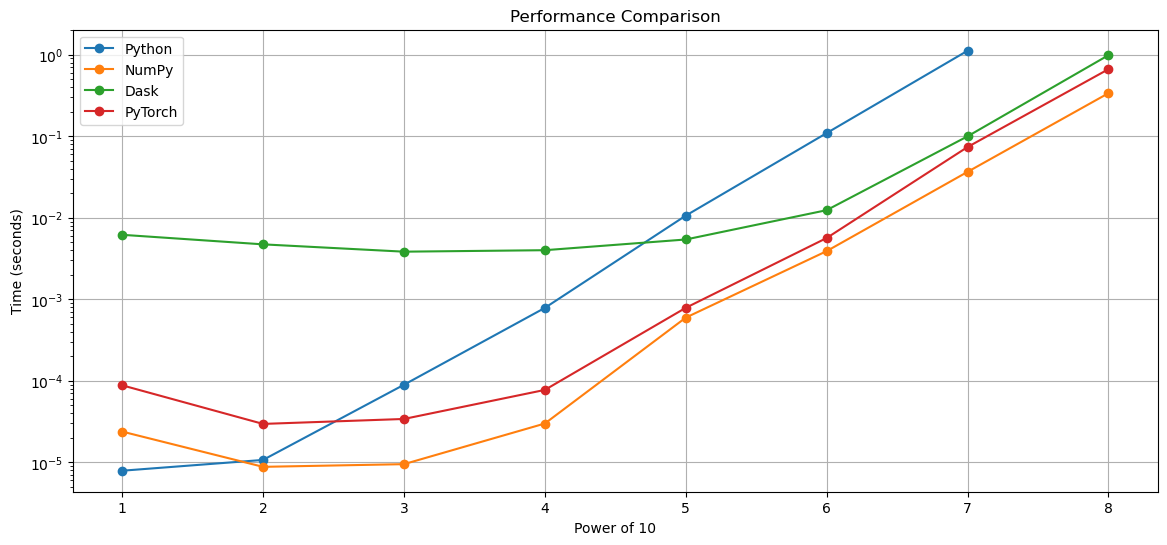

In [8]:
import matplotlib.pyplot as plt

powers = df["Power"].tolist()
python_times = df["Python"].tolist()
numpy_times = df["NumPy"].tolist()
dask_times = df["Dask"].tolist()
torch_times = df["Torch"].tolist()

plt.figure(figsize=(14, 6))
plt.plot(powers, python_times, marker='o', label='Python')
plt.plot(powers, numpy_times, marker='o', label='NumPy')
plt.plot(powers, dask_times, marker='o', label='Dask')
plt.plot(powers, torch_times, marker='o', label='PyTorch')

plt.title('Performance Comparison')
plt.xlabel('Power of 10')
plt.ylabel('Time (seconds)')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.legend()
plt.grid(True)
plt.xticks(powers)

plt.show()